<a href="https://www.kaggle.com/code/neesham/prediction-of-placements?scriptVersionId=92006323" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>



![Placements](http://www.khichdionline.com/wp-content/uploads/2015/02/banner-placement.jpg)

## Loading Tools

In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px

> ## God is an Engineer.

In [3]:
df = pd.read_csv("/kaggle/input/engineering-placements-prediction/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


## Basic EDA

In [4]:
df.shape

(2966, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [6]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [7]:
df["Stream"] = df["Stream"].replace(to_replace = "Electronics And Communication", value = "Electronics")


In [8]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


## Checking Outliers

<AxesSubplot:xlabel='Age'>

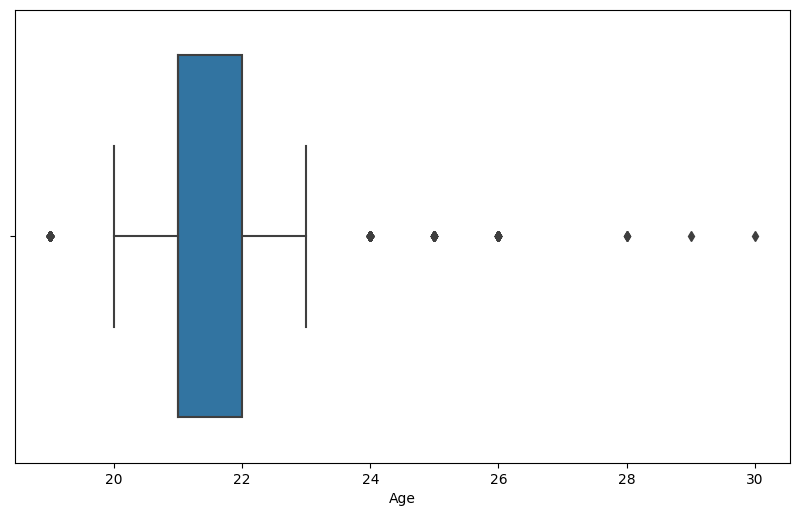

In [9]:
plt.figure(figsize = (10, 6), dpi = 100)
sns.boxplot(x = "Age", data = df)

## Data Visualization

<AxesSubplot:xlabel='Stream', ylabel='count'>

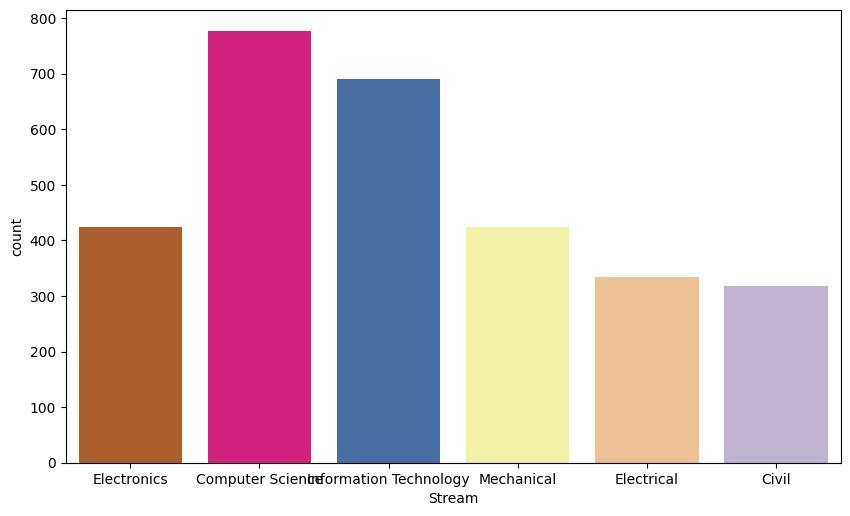

In [10]:
plt.figure(figsize = (10, 6), dpi = 100)


color_palette = sns.color_palette("Accent_r")
sns.set_palette(color_palette)

sns.countplot(x = "Stream", data = df)

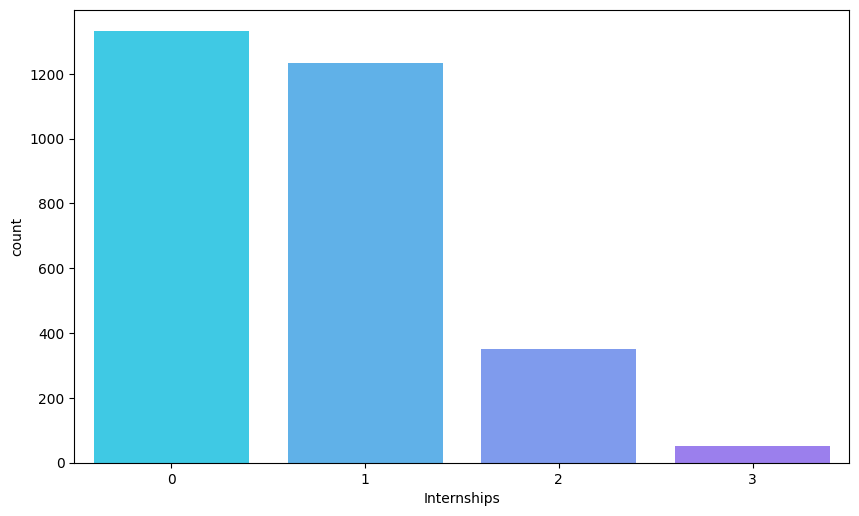

In [11]:
plt.figure(figsize = (10, 6), dpi = 100)


color_palette = sns.color_palette("cool")
sns.set_palette(color_palette)

sns.countplot(x = "Internships", data = df)
plt.show()

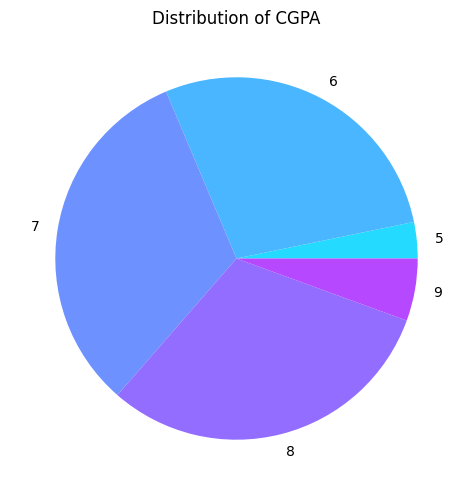

In [12]:
plt.figure(figsize = (10, 6), dpi = 100)
grp = dict(df.groupby('CGPA').groups)

m = {}

for key, val in grp.items():
    
    if key in m:
        m[key] += len(val)
        
    else:
        m[key] = len(val)

    
plt.title("Distribution of CGPA")
plt.pie(m.values(), labels = m.keys())
plt.show()

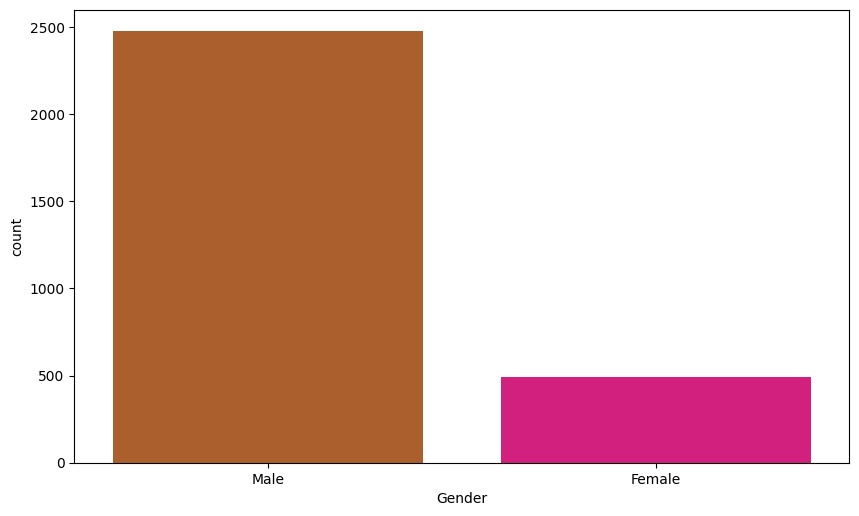

In [13]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("Accent_r")
sns.set_palette(color_palette)

sns.countplot(x = "Gender", data = df)

plt.show()

## Relationships

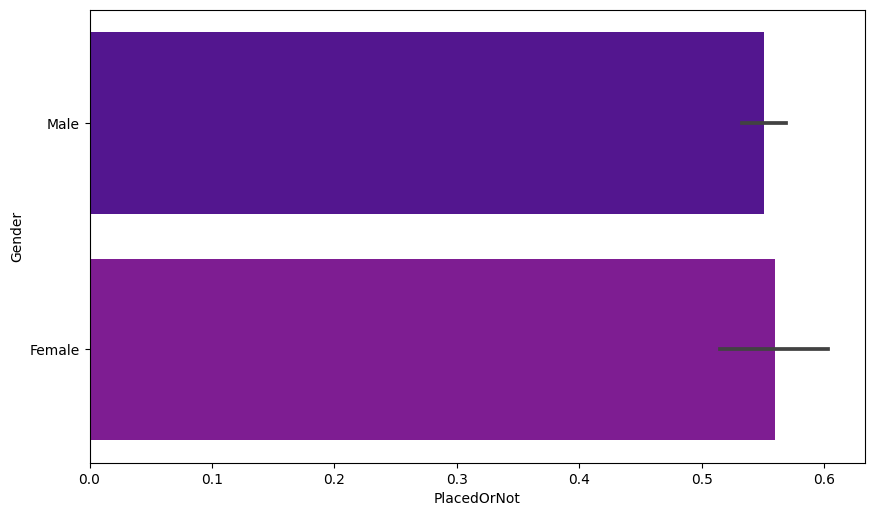

In [14]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("plasma")
sns.set_palette(color_palette)

sns.barplot(x = "PlacedOrNot", y = "Gender", data = df)

plt.show()

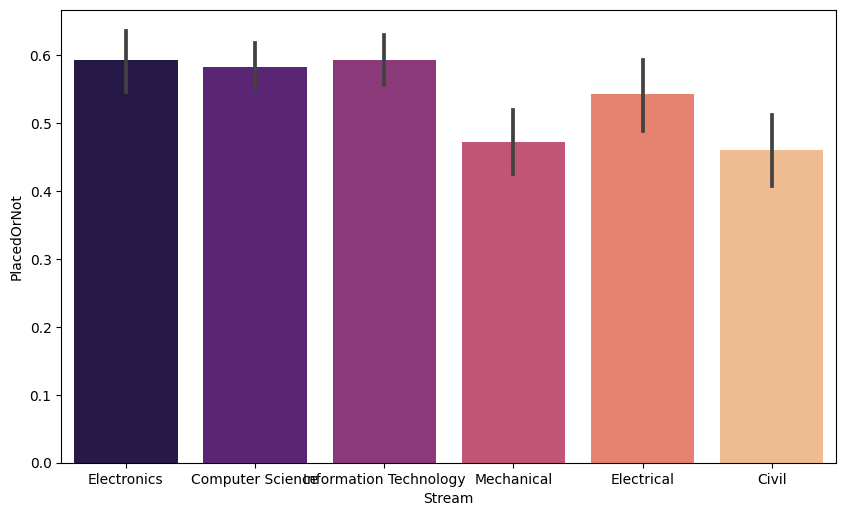

In [15]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("magma")
sns.set_palette(color_palette)

sns.barplot(x = "Stream", y = "PlacedOrNot", data = df)

plt.show()

## Finally, how many placed?

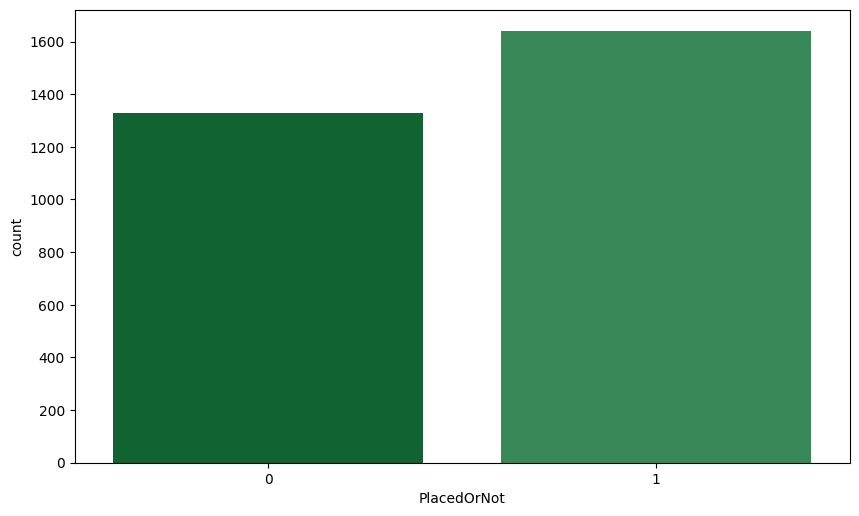

In [16]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("BuGn_r")
sns.set_palette(color_palette)

sns.countplot(x = "PlacedOrNot", data = df)

plt.show()

## Correlation

<AxesSubplot:>

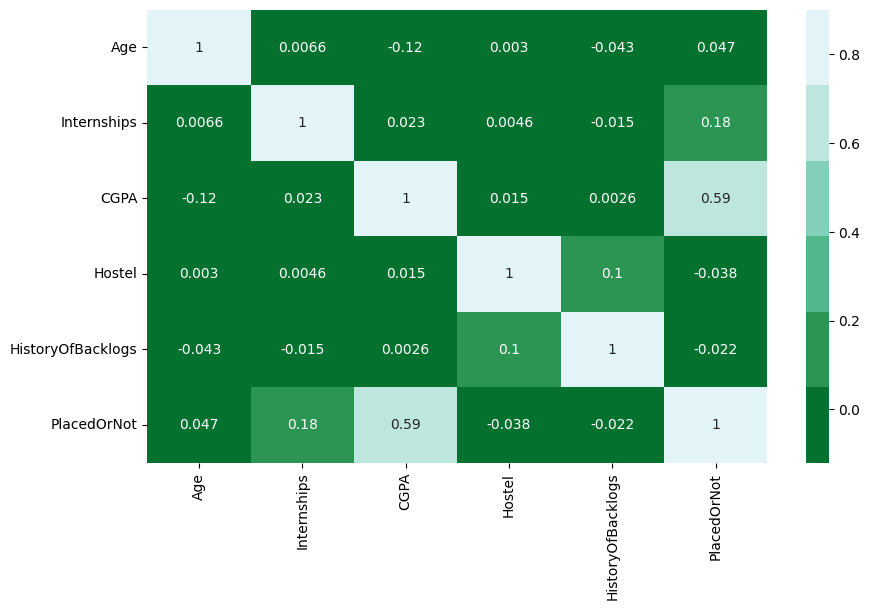

In [17]:
plt.figure(figsize = (10, 6), dpi = 100)
color = sns.color_palette("BuGn_r")
sns.heatmap(df.corr(), vmax=0.9, annot=True,cmap = color)

## Model 2: RandomForestClassifier

Transforming Categorical variables into numerical. Because RandomForestClassifier Works only with numerical data.

In [18]:
le = preprocessing.LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])
df["Stream"] = le.fit_transform(df["Stream"])

In [19]:
X=df[['Age', 'Gender', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'Stream']]
y= df["PlacedOrNot"]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=100)

clff = RandomForestClassifier().fit(x_train,y_train)

pred = clff.predict(x_test)

## Accuracy of RandomForestClassifier

In [20]:
acc = accuracy_score(y_test, pred)
acc

0.8775280898876404

## Model 1: CatBoostClassifier

In [21]:
from catboost import CatBoostClassifier

X = df[['Age', 'Gender', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'Stream']]

y = df["PlacedOrNot"]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=100)

clf = CatBoostClassifier(
    
    iterations = 5, 
    learning_rate = 0.1, 
    loss_function='CrossEntropy',
    
).fit(x_train, y_train)


pred = clf.predict(x_test)


0:	learn: 0.6460034	total: 50.7ms	remaining: 203ms
1:	learn: 0.6054613	total: 51.6ms	remaining: 77.4ms
2:	learn: 0.5676533	total: 52.1ms	remaining: 34.7ms
3:	learn: 0.5373964	total: 52.6ms	remaining: 13.1ms
4:	learn: 0.5126927	total: 53ms	remaining: 0us


## Accuracy of CatBoostClassifier

In [22]:
acc = accuracy_score(y_test, pred)
acc

0.8820224719101124

### Thanks for reading this notebook.
### Checkout my other notebooks 🙃
* [Deep Neural Network V/S XGBoost](https://www.kaggle.com/code/neesham/deep-neural-network-v-s-xgboost)
* [EDA - Google Play Store](https://www.kaggle.com/code/neesham/eda-google-play-store)